[Home](Home.ipynb)

# Example Study Sheet:  Sigma Notation

This student is grappling with Sigma notation i.e. notation that might be understood in terms of a computer language, with a looping construct.  Most languages have that, including Python.

A first place where "summing terms" comes up is in deconstructing ordinary integers into expressions using a "base" to some power, the power coming from the "place value" of a digit.

For example, the number $12345$ represents:

$$
1(10^{4}) + 2(10^{3}) + 3(10^{2}) + 4(10^{1}) + 5(10^{0})
$$

The same number in base 3 is $121221020$ because:

$$
1(3^{8}) + 2(3^{7}) + 1(3^{6}) + 2(3^{5}) + 2(3^{4}) + 1(3^{3}) + 2(3^{1})
$$

is the number in question.

In [1]:
int('121221020', 3)  # convert to base 10 int from any base

12345

Lets take those terms in the form of a list of tuples, and add them up.  Each term $(c, d)$ is evaluated with respect to a given base b as: $c(b^{d})$.  For example $(2, 7)$ gives $2(3^{7})$ and so on.

In [2]:
terms = [(1, 8), (2, 7), (1, 6), (2, 5), (2, 4), (1, 3), (2, 1)]
total = 0
base  = 3
for t in terms:
    coeff, degree = t  # unpacking assignment
    total += coeff * base ** degree  # running total
total

12345

In Jupyter Markdown, we can represent Sigma using $\LaTeX$:

$$
\sum\limits_{i=1}^n i^2 = \frac{n(n+1)(2n+1)}{6}
$$

The ```Sigma``` function below is meant to be very generic, meaning as long as the single variable, the index, is sufficient to drive the output of successive terms, we're free to provide the corresponding [callable object](Internals.ipynb).

For example, the expression ```lambda x: 1/x**2``` is callable and may be passed directly as the last argument to ```Sigma```.

Or maybe we just use the index to lookup a term in a sequence, where the values were computed earlier and simply stored in order.

In [3]:
base = 3
def get_term(i):
    c, d = terms[i]  # terms already specified above
    return c * base**d

In [4]:
get_term(0)

6561

In [5]:
get_term(1)

4374

Capitalizing the name of a Python function is a slight break with style conventions (see PEP 8).  However, the allusion here is to the ```\Sigma``` in $\LaTeX$. 

To get the uppercase Greek sigma in $\LaTeX$, we spell it with a capital S.  Otherwise we get $\sigma$ i.e. the lowercase Greek sigma.

In [6]:
def Sigma(start, stop, any_callable):
    total = 0
    for i in range(start, stop+1):
        total += any_callable(i) # running total
    return total

The key to this function is ```any_callable``` meaning some object that "eats" the index and comes back with each successive term to be summed.

A "lambda expression" defines a callable object as a one liner, without the need for a specific name (other than lambda).

In [7]:
Sigma(1, 100, lambda x: 1/x**2) # sum 1/1 + 1/4 + 1/9 + 1/16... 1/100**2

1.6349839001848923

Lets sum these earlier terms, given our original list, and using term (above) for any_callable:

$$
1(3^{8}) + 2(3^{7}) + 1(3^{6}) + 2(3^{5}) + 2(3^{4}) + 1(3^{3}) + 2(3^{1})
$$

In [8]:
terms

[(1, 8), (2, 7), (1, 6), (2, 5), (2, 4), (1, 3), (2, 1)]

In [9]:
Sigma(0, len(terms)-1, get_term) # start indexing from 0

12345

Another function we commonly see with ```lambda```, is ```map```. The map function applies a callable (first argument) to an iterable (second argument).

In the example below, ```map``` gets used to derive some reciprocals in floating point form.

In [10]:
results = map(lambda x: 1/x, [1,2,3,4,5])
list(results)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]

#### Number Types

We've looked and integers, and floating point numbers.

Python lets us fuel the very same expressions with entirely different number types. 

For example, consider the Fraction type, here renamed Q, a letter commonly reserved for "rational numbers" i.e. "ratios".

In [11]:
from fractions import Fraction as Q

In [12]:
the_sum = Sigma(1, 100, lambda x: Q(1, x**2)) # 1/x**2 as p/q

In [13]:
the_sum

Fraction(1589508694133037873112297928517553859702383498543709859889432834803818131090369901, 972186144434381030589657976672623144161975583995746241782720354705517986165248000)

We can always ask for the type of a number:

In [14]:
type(the_sum)

fractions.Fraction

In [15]:
the_sum.numerator / the_sum.denominator  # same floating point answer

1.634983900184893

Note again how Python, and many computer languages, keep us thinking about types.  What type of number is involved in this computation?  

The types used in conventional mathematics, such as Complex $\mathbb{C}$, Real $\mathbb{R}$, Rational $\mathbb{Q}$, Integer $\mathbb{Z}$, are similar but not identical to types implemented on computers.

At the core of high school math is this notion of number types or sets, one within the other, with the progression through history being one of zooming back to see more encompassing sets.

$$
\mathbb{Z} \subset \mathbb{Q} \subset \mathbb{R} \subset \mathbb{C}
$$

In [16]:
type(1.0)

float

The next number type we might test (after floats and Fractions), is the Decimal, which will allow us many more digits of precision.  We get to control with how much precision.  Default is 28 decimal digits.

In [17]:
from decimal import Decimal, localcontext
with localcontext() as ctx:
    ctx.prec = 300
    the_sum = Sigma(1, 10000000, lambda x: 1/Decimal(x)**2)
the_sum

Decimal('1.64493396684823143647224849997935852288561656787346272344984394368905508945081916387691894393511335065864850694102516943852898129313846975027616798370227948688271259286100885516014659310032065086035182526395505636922550739754025892072461567010678770311619139305575053916476189039505623978859292825156')

We don't have to use lambda expressions.  What's done to x, to compute the term, may be more than we can comfortably fit in a one-liner.

Now our student does more background research on this specific sequence.  Does it converge and, if yes, to what?

In [18]:
from IPython.display import YouTubeVideo

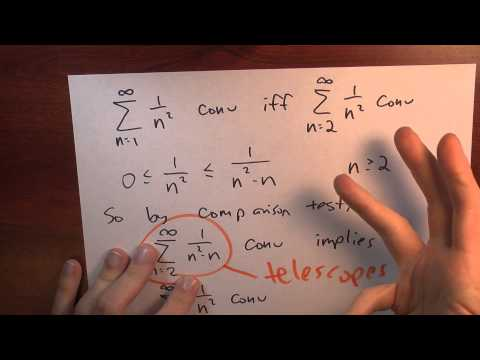

In [31]:
YouTubeVideo("9euTxoCC8Hk")

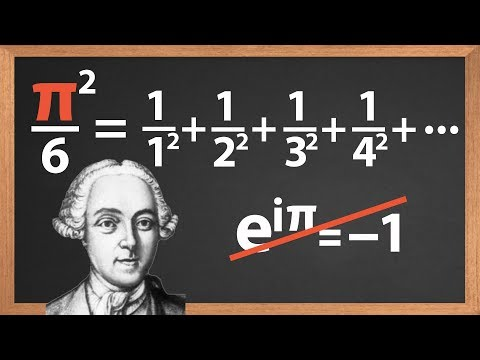

In [30]:
YouTubeVideo("yPl64xi_ZZA")

So, we have learned that:

$$
\sum\limits_{i=1}^\infty 1/i^2 = \pi^{2}/6
$$

In [20]:
pi = Decimal('3.1415926535897932384626433832795028841971693993751')
pi**2/6

Decimal('1.644934066848226436472415167')

In [21]:
the_sum

Decimal('1.64493396684823143647224849997935852288561656787346272344984394368905508945081916387691894393511335065864850694102516943852898129313846975027616798370227948688271259286100885516014659310032065086035182526395505636922550739754025892072461567010678770311619139305575053916476189039505623978859292825156')

Lets verify the identity we showcased up top:

$$
\sum\limits_{i=1}^n i^2 = \frac{n(n+1)(2n+1)}{6}
$$

In [22]:
def right_side(n):
    return n*(n+1)*(2*n + 1)//6

def left_side(n):
    return Sigma(1, n, lambda x: x**2)

In [23]:
right_side(100) == left_side(100)

True

In [24]:
right_side(1) == left_side(1)

True

In [25]:
right_side(12345) == left_side(12345)

True

This identity may be associated with a spatial ball packing pattern:  1 at the apex, 4 underpinning, 9 under that, and so on; a growing half-octahedron of balls.  What is the cumulative number of balls in a 10 layer arrangement?

Lets look at the sequence of successively larger half-octahedra packings:

In [26]:
print([Sigma(1, n, lambda x: x**2) for n in range(1, 11)])

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385]


Lets compare those numbers with what ```right_side``` would give us for the same n.

In [27]:
list(map(right_side, range(1, 11)))

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385]

What's that sequence in OEIS?  The square-pyramidal numbers, [A000330](https://oeis.org/A000330).

$\Sigma$ is used for adding all the terms.  Suppose we want to multiply them all together instead, is there a Greek letter for that too?  You betcha.

$$
\prod\limits_{i=1}^n x = x!
$$

Since Σ is a codepoint in Unicode, might we use Σ for our Python function name?  Lets try:

In [28]:
Σ = Sigma  # make a synonym

In [29]:
Σ(1, 10, lambda x: x)

55

Wow, we can!

Sigma Notation is often used to express infinite sums, meaning there's no defined end to the number of terms, and "at the limit" i.e. as we approach infinity, we may converge to a very specific number.

A lot of mathematics, including high school mathematics, if focused on these finite and infinite sums.  Sigma Notation comes in handy.  However you may also wish to write some analogous Python.